In [ ]:
import numpy as np
import cv2
from matplotlib import  pyplot as plt

In [13]:
# 首先加载图片，然后创建一个与所加载图片同形状的掩模，并用0填充
img = cv2.imread("D:/images/mushroom.jpg")
mask = np.zeros(img.shape[:2],np.uint8)

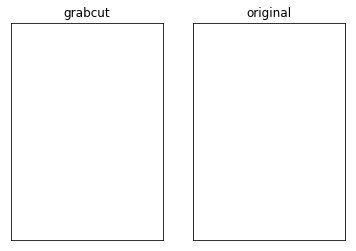

In [18]:
# 然后创建以0填充的前景和背景模型
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
# 在实现Grabcut算法前，先用一个标识出想要隔离的对象的矩形来初始化它，这个矩形我们用下面的一行代码定义（x,y,w,h):
rect = (100,50,821,958)
# 接下来用指定的空模型和掩模来运行GrabCut算法
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)#5是指算法迭代的次数
mask2 = np.where((mask == 2)|(mask==0),0,1).astype("uint8")
img = img*mask2[:,:,np.newaxis]
# 最后可视化展现分割前后的图像
plt.subplot(1,2,1)
# plt.imshow(img)
plt.title("grabcut"),plt.xticks([]),plt.yticks([])

plt.subplot(1,2,2)
# plt.imshow(cv2.imread("D:/images/mushroom.jpg"))
plt.title("original"),plt.xticks([]),plt.yticks([])
plt.savefig("D:/images/grabCut.jpg");

In [22]:
import cv2
import sys

print(cv2.__version__)
if __name__ == '__main__':
    tracker_types = ['BOOSTING','MIL','KCF','TLD','MEDIANFLOW','GOTURN']
    tracker_type = tracker_types[2]
    
    if tracker_type =='BOOSTING':
        tracker  = cv2.TrackerBoosting_create()
    if tracker_type =='MIL':
        tracker = cv2.TrackerMIL_create()
    if tracker_type == 'KCF':
        tracker = cv2.TrackerKCF_create()
    if tracker_type == 'TLD':
        tracker = cv2.TrackerTLD_create()
    if tracker_type =='MEDIANFLOW':
        tracker = cv2.TrackerMedianFlow_create()
    if tracker_type == 'GOTURN':
        tracker = cv2.TrackerGOTURN_create()
        
    video = cv2.VideoCapture(0)
    
    if not video.isOpened():
        print("could not open video")
        sys.exit()
#     read first frame
    ok,frame = video.read()
    if not ok:
        print("cannot read video file")
        sys.exit()
#     uncomment the line below to select a different bounding box
    bbox = cv2.selectROI(frame,False)
#   Initialize tracker with first frame and bounding box
    ok = tracker.init(frame,bbox)
    
    while True:
#         read a new frame
        ok,frame = video.read()
        if not ok:
            break;
#         start timer
        timer = cv2.getTickCount()
#       Update tracker
        ok,bbox = tracker.update(frame)
#       Calculate Frames per second
        fps = cv2.getTickFrequency()/(cv2.getTickCount()-timer)
        
        if ok:
#             tracking success
            p1 = (int(bbox[0]),int(bbox[1]))
            p2 = (int(bbox[0]+bbox[2]),int(bbox[1]+bbox[3]))
            cv2.rectangle(frame,p1,p2,(255,0,0),2,1)
        else:
#             Tracking failure
            cv2.putText(frame,"tracking failure detected",(100,80),cv2.FONT_HERSHEY_SIMPLEX,0.75,(0,0,255),2)
    
#       display tracker type on frame
        cv2.putText(frame,tracker_type+"tracker",(100,20),cv2.FONT_HERSHEY_SIMPLEX,0.75,(50,170,50),2)
#       display fps on frame
        cv2.putText(frame,"FPS:"+str(int(fps)),(100,50),cv2.FONT_HERSHEY_SIMPLEX,0.75,(50,170,50),2)
#      display result
        cv2.imshow('Tracking',frame)
#     Exit if esc pressed
        k = cv2.waitKey(1) & 0xff
        if k==27 :break
            

3.4.2
could not open video


SystemExit: 

C:\Users\admin\Anaconda3\envs\tensorflow\lib\site-packages\IPython\core\interactiveshell.py:2969: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
